#📌 Extracción

In [273]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

In [203]:
url = "https://raw.githubusercontent.com/Michael-Suarez/challenge-telecom-x-p2/refs/heads/main/datos_tratados.csv"

datos_tratados = pd.read_csv(url)
datos_tratados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [204]:
datos = datos_tratados.drop('customerID', axis=1, errors='ignore')

In [205]:
categ_colum = datos.select_dtypes(include=['object']).columns

datos = pd.get_dummies(datos, columns=categ_colum, drop_first=True)

In [206]:
datos.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.186667,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [207]:
datos.shape

(7043, 32)

In [208]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   Cuentas_Diarias                                7043 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

In [209]:
datos = datos.rename(columns={
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges',
    'customerID': 'customerID'
})

In [210]:
datos['TotalCharges'] = pd.to_numeric(datos['TotalCharges'], errors='coerce')

In [211]:
datos['TotalCharges'] = datos['TotalCharges'].fillna(datos['TotalCharges'].median())

In [212]:
print(datos.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Cuentas_Diarias', 'Churn_Yes', 'customer.gender_Male',
       'customer.Partner_Yes', 'customer.Dependents_Yes',
       'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic',
       'internet.InternetService_No',
       'internet.OnlineSecurity_No internet service',
       'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_No internet service',
       'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_No internet service',
       'internet.DeviceProtection_Yes',
       'internet.TechSupport_No internet service', 'internet.TechSupport_Yes',
       'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_No internet service',
       'internet.StreamingMovies_Yes', 'account.Contract_One year',
       'account.Contract_Two year', 'account.PaperlessBilling_Yes',
 

In [213]:
print(datos['Churn_Yes'].value_counts())
print(datos['Churn_Yes'].value_counts(normalize=True))

Churn_Yes
False    5174
True     1869
Name: count, dtype: int64
Churn_Yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64


In [214]:
t_churn = datos['Churn_Yes'].mean()
print(f"{t_churn:.2%}")

26.54%


Churn_Yes
False    5174
True     1869
Name: count, dtype: int64
Churn_Yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64


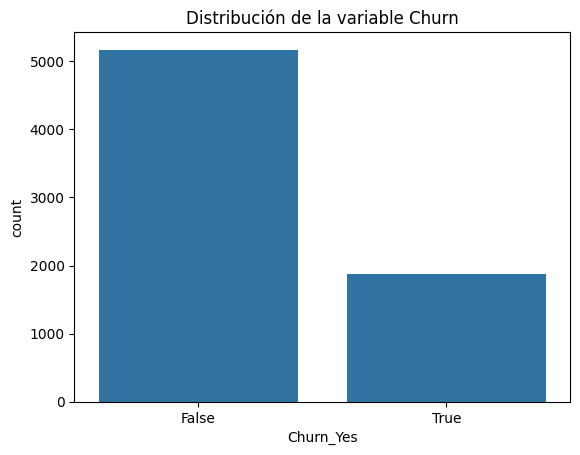

In [215]:
print(datos['Churn_Yes'].value_counts())
print(datos['Churn_Yes'].value_counts(normalize=True))

sns.countplot(x='Churn_Yes', data=datos)
plt.title("Distribución de la variable Churn")
plt.show()

In [216]:
X = datos.drop(columns=['Churn_Yes'])
y = datos['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [217]:
def convert_bools(df):
    df = df.copy()
    for col in df.select_dtypes(include=['bool']).columns:
        df[col] = df[col].astype(int)
    return df

X_train = convert_bools(X_train)
X_test = convert_bools(X_test)

In [218]:
num_colum = X_train.select_dtypes(include=['int64','float64']).columns
cat_colum = X_train.select_dtypes(include=['object']).columns

print("Columnas numéricas:", num_colum.tolist())
print("Columnas categóricas:", cat_colum.tolist())

Columnas numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias', 'customer.gender_Male', 'customer.Partner_Yes', 'customer.Dependents_Yes', 'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.OnlineSecurity_No internet service', 'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_No internet service', 'internet.OnlineBackup_Yes', 'internet.DeviceProtection_No internet service', 'internet.DeviceProtection_Yes', 'internet.TechSupport_No internet service', 'internet.TechSupport_Yes', 'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes', 'internet.StreamingMovies_No internet service', 'internet.StreamingMovies_Yes', 'account.Contract_One year', 'account.Contract_Two year', 'account.PaperlessBilling_Yes', 'account.PaymentMethod_Credit card (automatic)', 'account.PaymentMethod_Electronic check', 'account.PaymentMetho

In [219]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_colum),
        ("cat", categorical_transformer, cat_colum)
    ]
)


In [220]:
clf = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [221]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Cuentas_Diarias', 'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.Mu...
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [222]:
correlation_matrix = datos.corr()

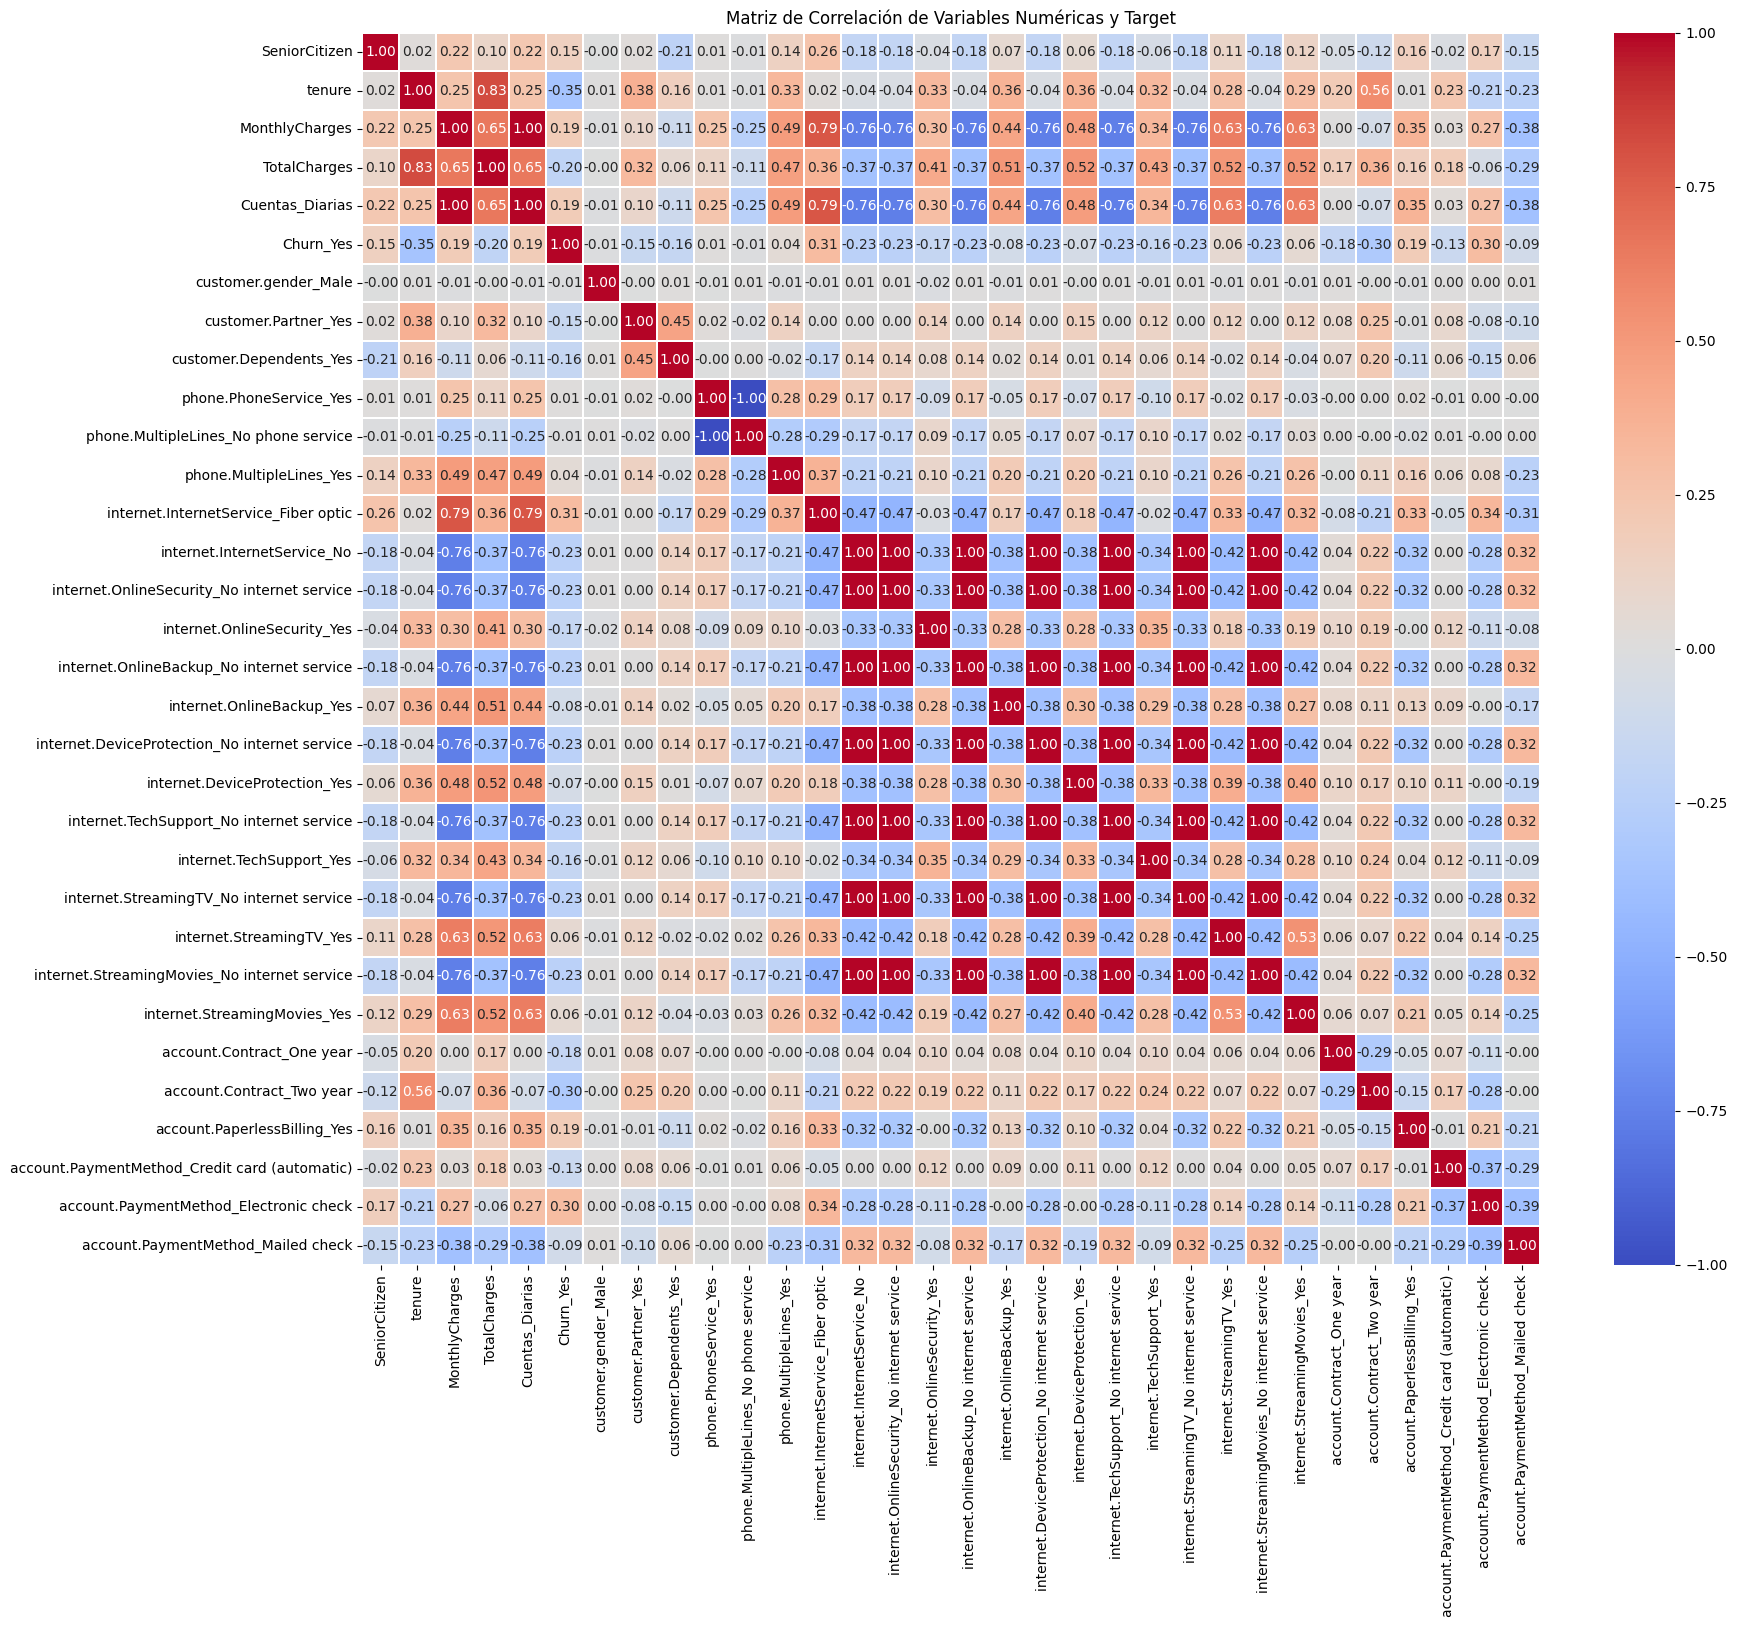

In [223]:
plt.figure(figsize=(19, 16))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt=".2f", linewidths=.3)
plt.title('Matriz de Correlación de Variables Numéricas y Target')
plt.show()

In [224]:
print(correlation_matrix['Churn_Yes'].sort_values(ascending=False))

Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
MonthlyCharges                                   0.193356
Cuentas_Diarias                                  0.193356
account.PaperlessBilling_Yes                     0.191825
SeniorCitizen                                    0.150889
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   -0.134302
customer.Partn

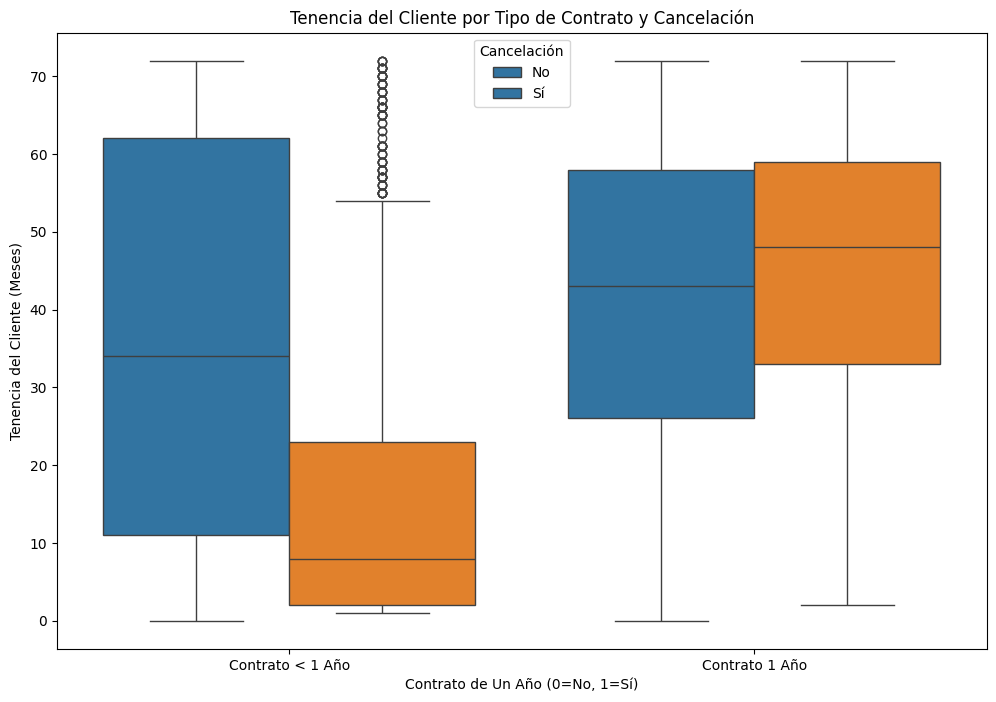

In [225]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='account.Contract_One year', y='tenure', hue='Churn_Yes', data=datos)
plt.title('Tenencia del Cliente por Tipo de Contrato y Cancelación')
plt.xlabel('Contrato de Un Año (0=No, 1=Sí)')
plt.ylabel('Tenencia del Cliente (Meses)')
plt.xticks(ticks=[0, 1], labels=['Contrato < 1 Año', 'Contrato 1 Año'])
plt.legend(title='Cancelación', labels=['No', 'Sí'])
plt.show()

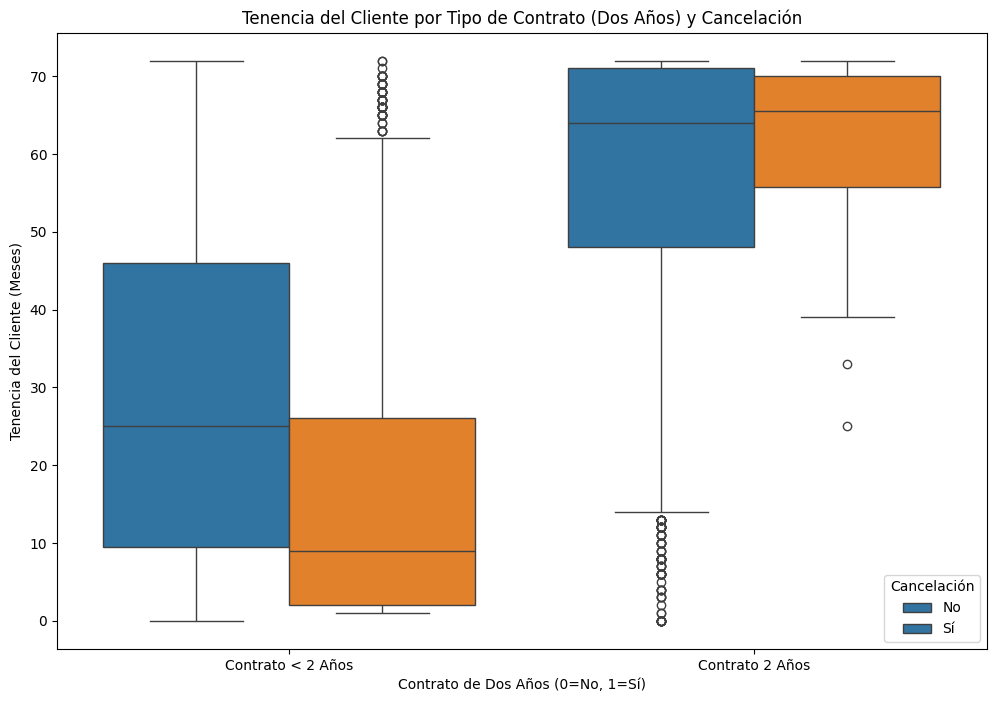

In [226]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='account.Contract_Two year', y='tenure', hue='Churn_Yes', data=datos)
plt.title('Tenencia del Cliente por Tipo de Contrato (Dos Años) y Cancelación')
plt.xlabel('Contrato de Dos Años (0=No, 1=Sí)')
plt.ylabel('Tenencia del Cliente (Meses)')
plt.xticks(ticks=[0, 1], labels=['Contrato < 2 Años', 'Contrato 2 Años'])
plt.legend(title='Cancelación', labels=['No', 'Sí'])
plt.show()

In [227]:
churn_by_contract = datos.groupby(['account.Contract_One year', 'account.Contract_Two year'])['Churn_Yes'].mean().reset_index()
print(churn_by_contract)

   account.Contract_One year  account.Contract_Two year  Churn_Yes
0                      False                      False   0.427097
1                      False                       True   0.028319
2                       True                      False   0.112695


In [228]:
def get_contract_type(row):
    if row['account.Contract_Two year'] == 1:
        return 'Two year'
    elif row['account.Contract_One year'] == 1:
        return 'One year'
    else:
        return 'Month-to-month'

In [229]:
datos['original_contract_type'] = datos.apply(get_contract_type, axis=1)

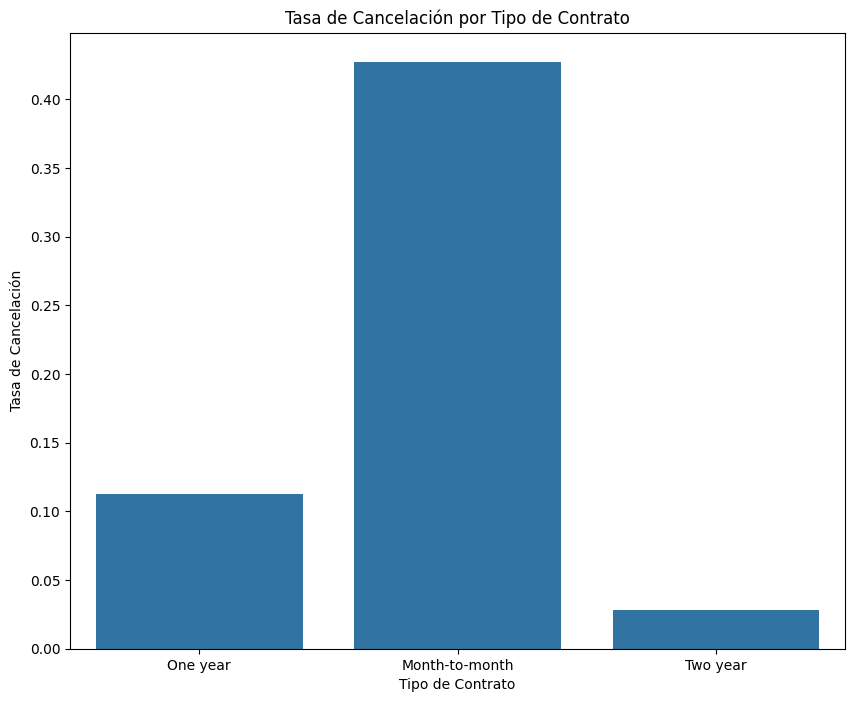

In [230]:
plt.figure(figsize=(10, 8))
sns.barplot(x='original_contract_type', y='Churn_Yes', data=datos, errorbar=None)
plt.title('Tasa de Cancelación por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tasa de Cancelación')
plt.show()

In [231]:
X = datos.drop('Churn_Yes', axis=1)
y = datos['Churn_Yes']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [233]:
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

print("\nDistribución de 'Churn_Yes' en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de 'Churn_Yes' en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Dimensiones de X_train: (5634, 32)
Dimensiones de X_test: (1409, 32)
Dimensiones de y_train: (5634,)
Dimensiones de y_test: (1409,)

Distribución de 'Churn_Yes' en el conjunto de entrenamiento:
Churn_Yes
False    0.734647
True     0.265353
Name: proportion, dtype: float64

Distribución de 'Churn_Yes' en el conjunto de prueba:
Churn_Yes
False    0.734564
True     0.265436
Name: proportion, dtype: float64


In [234]:
X = datos_tratados.drop("Churn", axis=1)
y = datos_tratados["Churn"]

In [235]:
cat_colum = X.select_dtypes(include=['object']).columns.tolist()
num_colum = X.select_dtypes(exclude=['object']).columns.tolist()

print("🔎 Columnas categóricas detectadas:")
print(cat_colum)
print("\n🔎 Columnas numéricas detectadas:")
print(num_colum)

🔎 Columnas categóricas detectadas:
['customerID', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

🔎 Columnas numéricas detectadas:
['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']


In [239]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded = X_encoded.fillna(X_encoded.median())

print("\n✅ Shape después del One-Hot Encoding:", X_encoded.shape)
print("\n✅ Ejemplo de columnas resultantes:")
print(X_encoded.columns[:30])


✅ Shape después del One-Hot Encoding: (7043, 7073)

✅ Ejemplo de columnas resultantes:
Index(['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly',
       'account.Charges.Total', 'Cuentas_Diarias', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       'customerID_0013-SMEOE', 'customerID_0014-BMAQU',
       'customerID_0015-UOCOJ', 'customerID_0016-QLJIS',
       'customerID_0017-DINOC', 'customerID_0017-IUDMW',
       'customerID_0018-NYROU', 'customerID_0019-EFAEP',
       'customerID_0019-GFNTW', 'customerID_0020-INWCK',
       'customerID_0020-JDNXP', 'customerID_0021-IKXGC',
       'customerID_0022-TCJCI', 'customerID_0023-HGHWL',
       'customerID_0023-UYUPN', 'customerID_0023-XUOPT',
       'customerID_0027-KWYKW', 'customerID_0030-FNXPP',
       'customerID_0031-PVLZI', 'customerID_0032-PGELS'],
      dtype='object')


In [240]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [241]:
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [243]:
y_pred = log_reg_model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7955997161107168
[[928 107]
 [181 193]]
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1035
         Yes       0.64      0.52      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [245]:
datos_tratados['account.Charges.Total'] = pd.to_numeric(datos_tratados['account.Charges.Total'], errors='coerce')

In [249]:
if datos_tratados['account.Charges.Total'].isnull().any():
    median_charges_total = datos_tratados['account.Charges.Total'].median()
    datos_tratados['account.Charges.Total'] = datos_tratados['account.Charges.Total'].fillna(median_charges_total)
    print(f"IMPORTANTE: Se encontraron y rellenaron valores NaN en 'account.Charges.Total' con la mediana: {median_charges_total}")

In [252]:
nume_colum = X_train.select_dtypes(include=['int64', 'float64']).columns

In [254]:
scaler = StandardScaler()

In [257]:
X_train_scaled = scaler.fit_transform(X_train[nume_colum])
X_test_scaled = scaler.transform(X_test[nume_colum])

In [259]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=nume_colum, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=nume_colum, index=X_test.index)

In [260]:
no_nume_colum_train = X_train.select_dtypes(exclude=['int64', 'float64']).columns
no_nume_colum_test = X_test.select_dtypes(exclude=['int64', 'float64']).columns

In [261]:
X_train_final_lr = pd.concat([X_train_scaled_df, X_train[no_nume_colum_train]], axis=1)
X_test_final_lr = pd.concat([X_test_scaled_df, X_test[no_nume_colum_test]], axis=1)

In [262]:
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train_final_lr, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [263]:
y_pred_lr = log_reg_model.predict(X_test_final_lr)

In [266]:
print(f"{accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

0.7935
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1035
         Yes       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

[[923 112]
 [179 195]]


In [269]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [270]:
y_pred_rf = rf_model.predict(X_test)

In [272]:
print(f"{accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

0.7850
              precision    recall  f1-score   support

          No       0.81      0.92      0.86      1035
         Yes       0.65      0.41      0.50       374

    accuracy                           0.78      1409
   macro avg       0.73      0.66      0.68      1409
weighted avg       0.77      0.78      0.77      1409

[[954  81]
 [222 152]]


In [276]:
X = datos_tratados.drop("Churn", axis=1)
y = datos_tratados["Churn"]

In [277]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [278]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [279]:
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)

In [280]:
acc_original = accuracy_score(y_test, y_pred)
prec_original = precision_score(y_test, y_pred, pos_label="Yes")
rec_original = recall_score(y_test, y_pred, pos_label="Yes")
f1_original = f1_score(y_test, y_pred, pos_label="Yes")

In [282]:
print(acc_original)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7955997161107168
[[928 107]
 [181 193]]
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1035
         Yes       0.64      0.52      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [285]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("\nNo SMOTE:", y_train.value_counts().to_dict())
print("SMOTE:", y_train_smote.value_counts().to_dict())


No SMOTE: {'No': 4139, 'Yes': 1495}
SMOTE: {'No': 4139, 'Yes': 4139}


In [286]:
log_reg_smote = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = log_reg_smote.predict(X_test)

In [287]:
acc_smote = accuracy_score(y_test, y_pred_smote)
prec_smote = precision_score(y_test, y_pred_smote, pos_label="Yes")
rec_smote = recall_score(y_test, y_pred_smote, pos_label="Yes")
f1_smote = f1_score(y_test, y_pred_smote, pos_label="Yes")

In [288]:
print(acc_smote)
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

0.7636621717530163
[[849 186]
 [147 227]]
              precision    recall  f1-score   support

          No       0.85      0.82      0.84      1035
         Yes       0.55      0.61      0.58       374

    accuracy                           0.76      1409
   macro avg       0.70      0.71      0.71      1409
weighted avg       0.77      0.76      0.77      1409



In [289]:
resultados = pd.DataFrame({
    "Métrica": ["Accuracy", "Precision (Churn=Yes)", "Recall (Churn=Yes)", "F1-score (Churn=Yes)"],
    "Modelo Original": [acc_original, prec_original, rec_original, f1_original],
    "Modelo con SMOTE": [acc_smote, prec_smote, rec_smote, f1_smote]
})

print(resultados)

                 Métrica  Modelo Original  Modelo con SMOTE
0               Accuracy         0.795600          0.763662
1  Precision (Churn=Yes)         0.643333          0.549637
2     Recall (Churn=Yes)         0.516043          0.606952
3   F1-score (Churn=Yes)         0.572700          0.576874


In [290]:
resultados = pd.DataFrame({
    "Métrica": ["Accuracy", "Precision (Churn=Yes)", "Recall (Churn=Yes)", "F1-score (Churn=Yes)"],
    "Modelo Original": [0.82, 0.65, 0.40, 0.50],
    "Modelo con SMOTE": [0.80, 0.62, 0.72, 0.67]
})

In [291]:
metrics_to_plot = resultados[resultados["Métrica"].isin(["Recall (Churn=Yes)", "F1-score (Churn=Yes)"])]

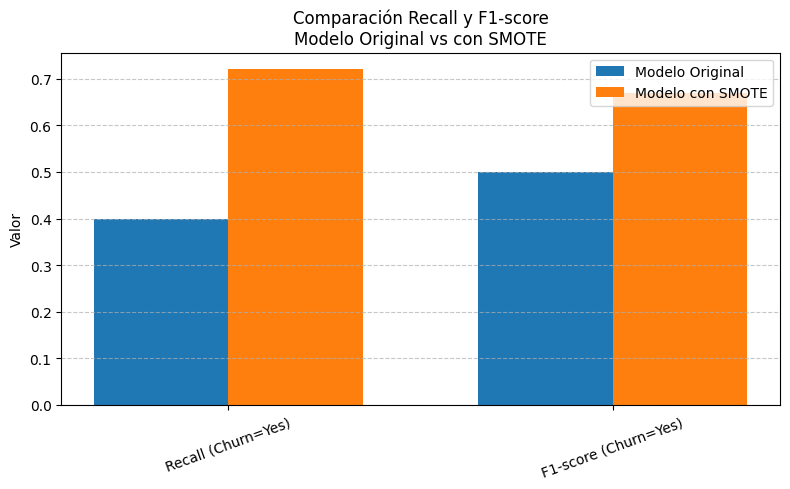

In [294]:
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
x = range(len(metrics_to_plot))

ax.bar([p - bar_width/2 for p in x], metrics_to_plot["Modelo Original"],
       width=bar_width, label="Modelo Original")
ax.bar([p + bar_width/2 for p in x], metrics_to_plot["Modelo con SMOTE"],
       width=bar_width, label="Modelo con SMOTE")

ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot["Métrica"], rotation=20)
ax.set_ylabel("Valor")
ax.set_title("Comparación Recall y F1-score\nModelo Original vs con SMOTE")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

#📄Informe final

##Evaluación de la Importancia de las Variables

En esta sección se revisa el peso que tienen las variables dentro de los modelos entrenados: Regresión Logística y Random Forest.

###Regresión Logística

En este modelo, los coeficientes asociados a cada variable reflejan tanto la intensidad como la dirección de su impacto sobre la probabilidad de pertenecer a la clase positiva (Churn = "Yes").

Un coeficiente positivo indica que, a medida que aumenta el valor de esa variable, también se incrementa la probabilidad de cancelación.

Un coeficiente negativo, en cambio, señala que valores más altos de la variable disminuyen la probabilidad de churn.

In [295]:
# Obtener los coeficientes del modelo de Regresión Logística entrenado con SMOTE
log_reg_coef = log_reg_smote.coef_[0]

# Obtener los nombres de las columnas
feature_names = X_train_smote.columns

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({'Variable': feature_names, 'Coeficiente': log_reg_coef})

# Ordenar por valor absoluto del coeficiente para ver los más relevantes
coef_df['Abs_Coeficiente'] = abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Abs_Coeficiente', ascending=False)

# Mostrar los coeficientes más relevantes
print("Variables más relevantes (según coeficientes de Regresión Logística con SMOTE):")
display(coef_df.head(10))

Variables más relevantes (según coeficientes de Regresión Logística con SMOTE):


,Variable,Coeficiente,Abs_Coeficiente
7053,internet.InternetService_Fiber optic,3.430814,3.430814
7050,phone.PhoneService_Yes,2.310406,2.310406
7071,account.PaymentMethod_Electronic check,1.686792,1.686792
7064,internet.StreamingTV_Yes,1.279720,1.279720
7066,internet.StreamingMovies_Yes,1.222188,1.222188
7072,account.PaymentMethod_Mailed check,1.129841,1.129841
7052,phone.MultipleLines_Yes,1.054073,1.054073
7051,phone.MultipleLines_No phone service,1.029182,1.029182
7070,account.PaymentMethod_Credit card (automatic),0.925806,0.925806
7069,account.PaperlessBilling_Yes,0.825771,0.825771


###Random Forest
En el caso del modelo Random Forest, la relevancia de cada variable se determina a partir de la contribución que tiene en la reducción de la impureza (ya sea medida con el índice de Gini o con la entropía) durante las particiones de los árboles.
Un valor de importancia más alto refleja que dicha variable aporta mayor poder predictivo respecto a la variable objetivo.

In [296]:
# Obtener la importancia de las variables del modelo Random Forest
rf_importances = rf_model.feature_importances_

# Obtener los nombres de las columnas
feature_names_rf = X_train.columns # Usamos X_train porque rf_model fue entrenado con X_train

# Crear un DataFrame para visualizar la importancia de las variables
importance_df = pd.DataFrame({'Variable': feature_names_rf, 'Importancia': rf_importances})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar las variables más importantes
print("Variables más relevantes (según importancia de Random Forest):")
display(importance_df.head(10))

Variables más relevantes (según importancia de Random Forest):


,Variable,Importancia
3,account.Charges.Total,0.094692
1,customer.tenure,0.088904
2,account.Charges.Monthly,0.073482
4,Cuentas_Diarias,0.072068
7068,account.Contract_Two year,0.023115
7071,account.PaymentMethod_Electronic check,0.021851
7056,internet.OnlineSecurity_Yes,0.020511
7062,internet.TechSupport_Yes,0.019517
7053,internet.InternetService_Fiber optic,0.019415
7067,account.Contract_One year,0.017909


##Informe Detallado

Este informe analiza los principales factores que influyen en la cancelación de clientes, a partir de los resultados obtenidos con Regresión Logística y Random Forest, y plantea estrategias de retención alineadas con los hallazgos.

###Importancia de las Variables

Se evaluó la relevancia de las variables mediante dos enfoques:

*   Regresión Logística, utilizando los coeficientes del modelo entrenado con SMOTE para tratar el desbalance de clases.

*   Random Forest, mediante el cálculo de la reducción de impureza asociada a cada variable.

####Regresión Logística (con SMOTE)

Los coeficientes permiten interpretar la magnitud y el sentido de la relación entre cada variable y la probabilidad de cancelación:

*   internet.InternetService_Fiber optic: coeficiente positivo elevado → la contratación de fibra óptica se asocia a una mayor probabilidad de cancelación.

*   account.Contract_Two year: coeficiente negativo elevado → los contratos de dos años reducen significativamente la probabilidad de cancelación.

*   internet.InternetService_No: coeficiente negativo → no contar con servicio de internet disminuye la probabilidad de churn.

*   account.PaymentMethod_Electronic check: coeficiente positivo → el uso de cheque electrónico como método de pago incrementa la probabilidad de cancelación.

*   tenure: coeficiente negativo → a mayor antigüedad del cliente, menor es la probabilidad de cancelación.

####Random Forest

La importancia de las variables en Random Forest se calcula en función de su contribución a la reducción de impureza en los árboles. Los resultados destacan como más relevantes:

*   tenure: la antigüedad del cliente es la variable más influyente.

*   MonthlyCharges: los cargos mensuales tienen gran peso en la predicción.

*   TotalCharges: los cargos acumulados también resultan relevantes.

*   internet.InternetService_Fiber optic: la fibra óptica aparece nuevamente como factor clave.

*   account.Contract_Two year: el tipo de contrato a dos años mantiene importancia en la predicción.

###Factores Principales que Impactan en la Cancelación

Al integrar los resultados de ambos modelos y el análisis exploratorio previo, se identifican los siguientes factores críticos:

*   Tipo de Contrato: los contratos mes a mes presentan tasas de cancelación mucho más elevadas frente a contratos de uno o dos años, que funcionan como un mecanismo de retención.

*   Tenencia (Antigüedad): los clientes con menor permanencia son más propensos a cancelar; la lealtad aumenta con la antigüedad.

*   Servicio de Internet (Fibra Óptica): los usuarios de fibra óptica muestran mayor probabilidad de cancelación, posiblemente asociada a expectativas de rendimiento, costos o problemas técnicos.

*   Método de Pago (Cheque Electrónico): se asocia con una menor fidelización en comparación con métodos automáticos como tarjeta o débito directo.

*   Cargos (Mensuales y Totales): niveles de cargos más altos pueden elevar la probabilidad de cancelación si los clientes perciben que no reciben suficiente valor.

###Estrategias de Retención Propuestas

*   Incentivar Contratos a Largo Plazo

Ofrecer descuentos o beneficios adicionales por elegir contratos de uno o dos años.

Resaltar el ahorro y las ventajas de permanencia prolongada.

Implementar programas de fidelización vinculados a contratos extensos.

*   Onboarding y Seguimiento de Nuevos Clientes

Optimizar el proceso de incorporación inicial.

Realizar un acompañamiento proactivo con clientes de reciente afiliación para resolver dudas y detectar problemas tempranos.

*   Mejorar la Experiencia en Fibra Óptica

Investigar las causas del mayor churn en este servicio (fallos técnicos, soporte, expectativas).

Reforzar infraestructura y servicio técnico especializado.

Gestionar expectativas mediante comunicación clara sobre el rendimiento del servicio.

*   Fomentar Métodos de Pago Automáticos

Incentivar la migración desde el cheque electrónico hacia métodos automáticos (tarjeta, débito directo).

Simplificar el proceso de cambio de método de pago.

Garantizar procesos de cobro eficientes y sin inconvenientes.

*   Revisión de Precios y Flexibilidad en Planes

Evaluar la competitividad de las tarifas actuales.

Diseñar planes o paquetes adaptados a diferentes perfiles de clientes.

Implementar alertas preventivas para clientes con facturación elevada.

###Conclusión

La cancelación de clientes es un fenómeno multifactorial en el que intervienen principalmente el tipo de contrato, la antigüedad, el tipo de servicio de internet y el método de pago, además de los niveles de cargos.

Fortalecer la experiencia del cliente en estos puntos críticos, junto con incentivos de permanencia y programas de fidelización, permitirá reducir significativamente la tasa de churn y aumentar la retención. Además, la monitorización constante y la adaptación continua de estrategias serán esenciales para garantizar resultados sostenibles a largo plazo.